<a href="https://colab.research.google.com/github/Skannan03/codsoft/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment no. 2

### Congorise InfoTech

# Approach to the prediction
* 1.Import all libaray
* 2.Load and audit the data
* 3.Data prepration and Data Transformation
    * 1.Dealing with missing value
    * 2.Inconsistent value: Replace all transformation with consistent values
    * 3.Dealing With Outliers
* 4.Data visualization
* 5.Data analysis
    * 1.Uni-variate Analysis(Mean,Median,Mode,Skewness)
    * 2.Bi-variate Analysis(Correlation,Covariance,Chi-Square Test)
    * 3.Multi-Variate Analysis
        * 1.Regression
        
            

# Importing the Libraries

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,GradientBoostingRegressor
import xgboost
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import  r2_score, mean_absolute_error, mean_squared_error,mean_squared_log_error


# Importing The Dataset

In [2]:
df=pd.read_csv('/content/advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


#EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [7]:
df.skew()

TV          -0.069853
Radio        0.094175
Newspaper    0.894720
Sales       -0.073739
dtype: float64

In [8]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
 df.drop_duplicates(inplace=True)

#Analysing the correlation

<Axes: >

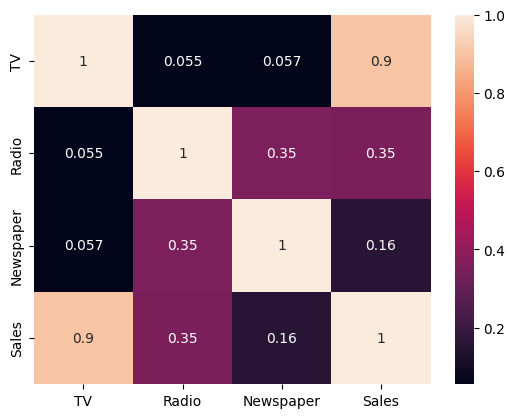

In [11]:
sns.heatmap(df.corr(),annot=True)


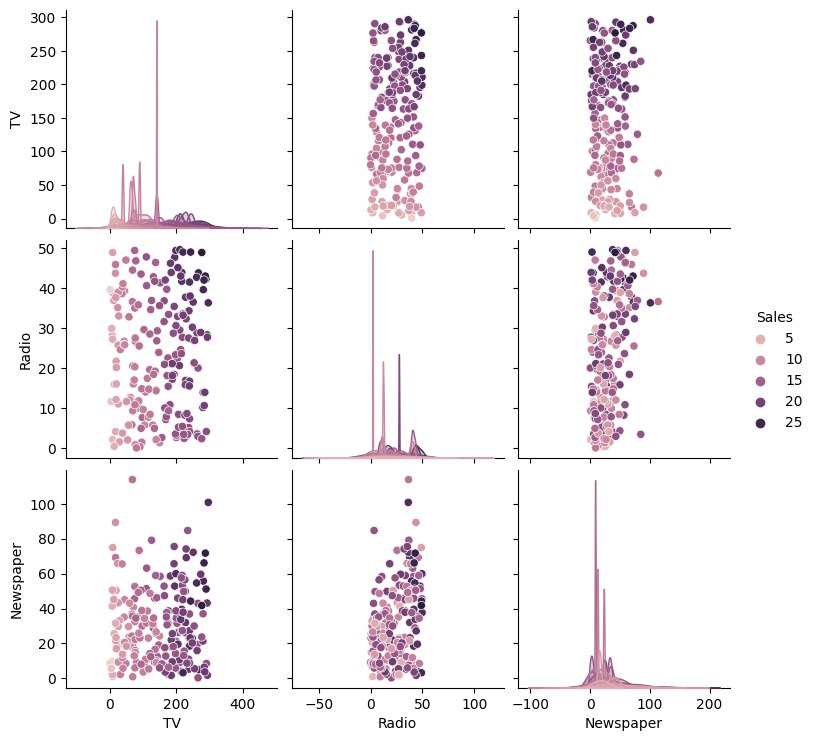

In [14]:
sns.pairplot(df,hue="Sales")

#Distribution of sales

<ipython-input-15-87032c1a53f4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sales'])


<Axes: xlabel='Sales', ylabel='Density'>

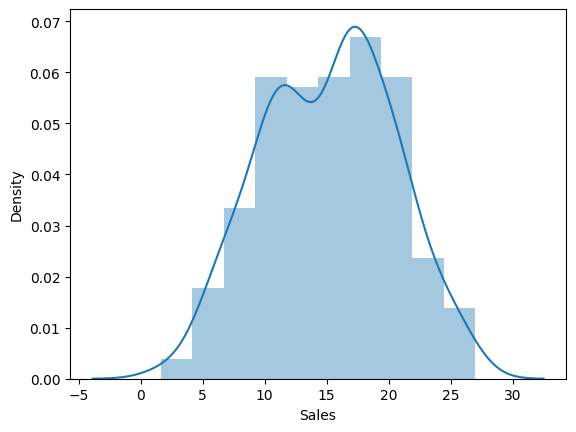

In [15]:
sns.distplot(df['Sales'])

#Outlier Analysis

<Axes: >

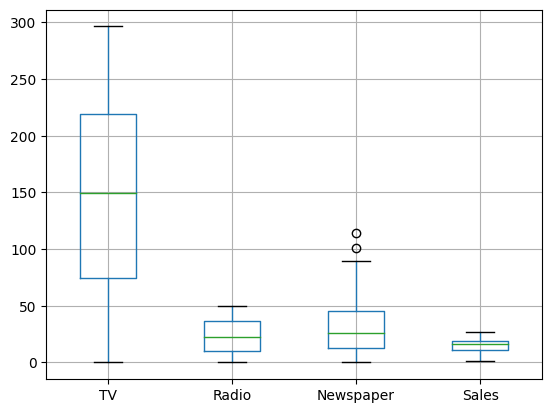

In [16]:
df.boxplot()

columns :  TV


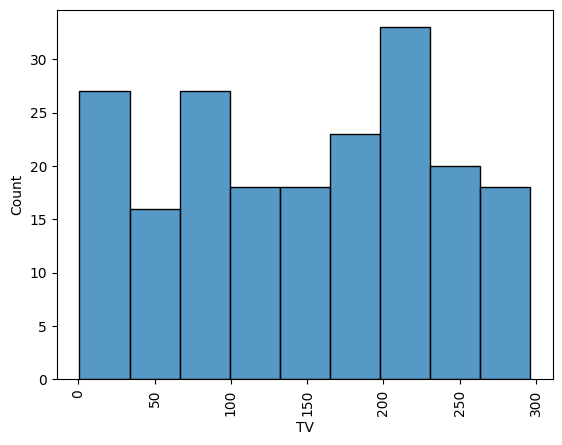

columns :  Radio


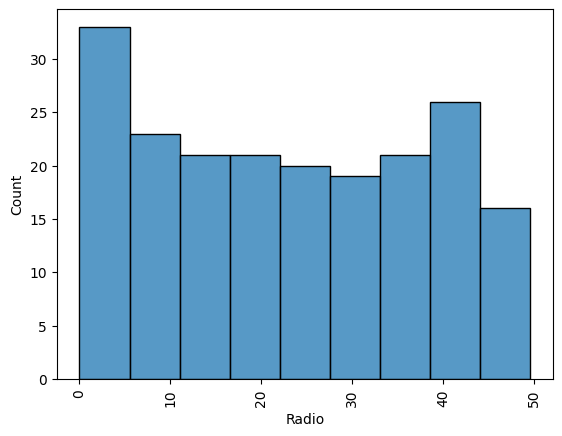

columns :  Newspaper


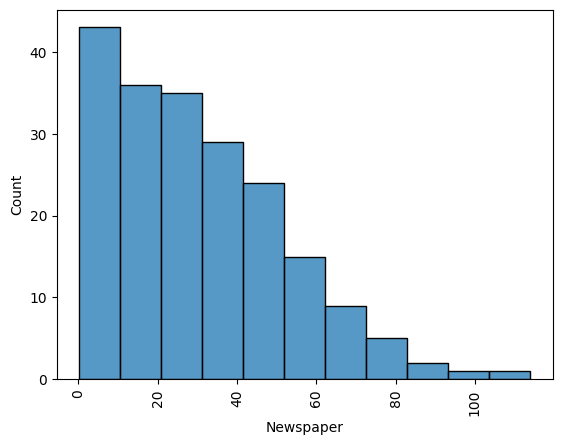

columns :  Sales


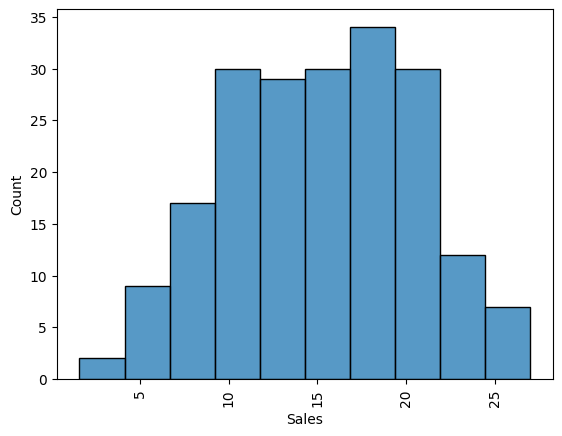

In [19]:
for i in df.columns:
  sns.histplot(df[i])
  print('columns : ' , i )
  plt.xticks(rotation = 'vertical')
  plt.show()

#Bivariate analysis

(0.0, 28.27)

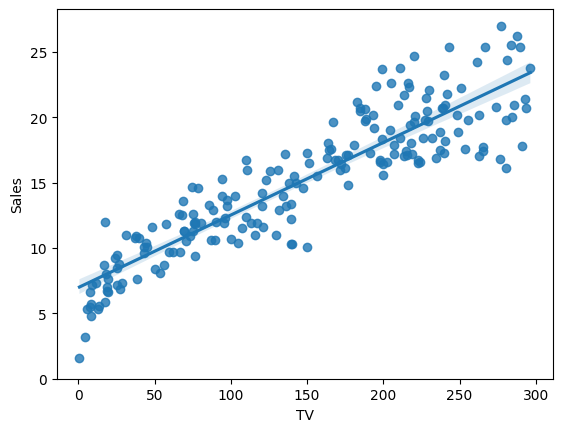

In [22]:
sns.regplot(x='TV',y='Sales',data=df)
plt.ylim(0,)

(0.0, 28.27)

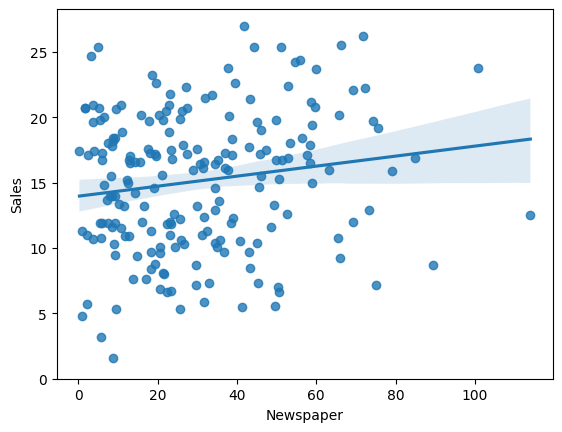

In [24]:
sns.regplot(x='Newspaper',y='Sales',data=df)
plt.ylim(0,)

(0.0, 28.27)

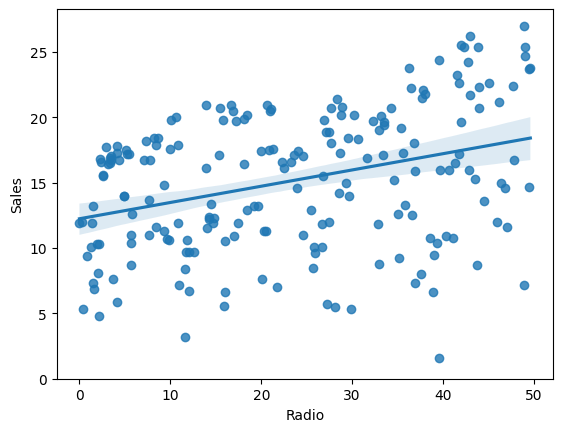

In [26]:
sns.regplot(x='Radio',y='Sales',data=df)
plt.ylim(0,)

#spliting the dataset

In [28]:
x = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [29]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=123)

In [36]:

def metrics(actual,pred):
  r2=r2_score(actual,pred)
  mse=mean_squared_error(actual,pred)
  mae=mean_absolute_error(actual,pred)
  rmse=mean_squared_error(actual,pred,squared=False)
  rmsle=mean_squared_log_error(actual,pred)
  print('R^2 Error',round(r2,4))
  print('MSE',round(mse,4))
  print('MAE',round(mae,4))
  print('RMSE',round(rmse,4),'\n')

#LinearRegression

In [39]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)
pred_train_lr=lr.predict(xtrain)
pred_test_lr=lr.predict(xtest)
metrics(ytrain,pred_train_lr)
metrics(ytest,pred_test_lr)

R^2 Error 0.8973
MSE 2.7363
MAE 1.2322
RMSE 1.6542 

R^2 Error 0.918
MSE 2.6297
MAE 1.2707
RMSE 1.6216 



#Ridge regression

In [42]:
rig=Ridge(alpha=0.5,solver='svd')
rig.fit(xtrain,ytrain)
pred_train_rig=rig.predict(xtrain)
pred_test_rig=rig.predict(xtest)
metrics(ytrain,pred_train_rig)
metrics(ytest,pred_test_rig)

R^2 Error 0.8973
MSE 2.7363
MAE 1.2322
RMSE 1.6542 

R^2 Error 0.918
MSE 2.6297
MAE 1.2707
RMSE 1.6216 



#Decision tree Regression

In [44]:
dc=DecisionTreeRegressor(max_depth=5,min_samples_split=3)
dc.fit(xtrain,ytrain)
pred_train=dc.predict(xtrain)
pred_test=dc.predict(xtest)
metrics(ytrain,pred_train)
metrics(ytest,pred_test)

R^2 Error 0.9676
MSE 0.8622
MAE 0.7011
RMSE 0.9285 

R^2 Error 0.956
MSE 1.4102
MAE 0.9703
RMSE 1.1875 



#RandomForestRegression

In [45]:
rf=RandomForestRegressor(n_estimators=200,max_depth=5,min_samples_split=2)
rf.fit(xtrain,ytrain)
pred_train=rf.predict(xtrain)
pred_test=rf.predict(xtest)
metrics(ytrain,pred_train)
metrics(ytest,pred_test)

R^2 Error 0.9735
MSE 0.7061
MAE 0.6409
RMSE 0.8403 

R^2 Error 0.9766
MSE 0.75
MAE 0.7155
RMSE 0.866 



#Gradient Boosting Regressor

In [46]:
gb=GradientBoostingRegressor(learning_rate=0.09,max_depth=3)
gb.fit(xtrain,ytrain)
pred_train=gb.predict(xtrain)
pred_test=gb.predict(xtest)
metrics(ytrain,pred_train)
metrics(ytest,pred_test)

R^2 Error 0.9917
MSE 0.2219
MAE 0.3624
RMSE 0.471 

R^2 Error 0.966
MSE 1.0918
MAE 0.8581
RMSE 1.0449 



#Ada Boosting Regressor

In [49]:
ada=AdaBoostRegressor(learning_rate=0.09,n_estimators=200)
ada.fit(xtrain,ytrain)
pred_train=ada.predict(xtrain)
pred_test=ada.predict(xtest)
metrics(ytrain,pred_train)
metrics(ytest,pred_test)

R^2 Error 0.9497
MSE 1.3413
MAE 0.974
RMSE 1.1582 

R^2 Error 0.9558
MSE 1.4164
MAE 0.9943
RMSE 1.1901 



In [50]:
np.sqrt(200)

14.142135623730951

#KNN

In [51]:
knn=KNeighborsRegressor(n_neighbors=15)
knn.fit(xtrain,ytrain)
pred_train=knn.predict(xtrain)
pred_test=knn.predict(xtest)
metrics(ytrain,pred_train)
metrics(ytest,pred_test)

R^2 Error 0.8885
MSE 2.9704
MAE 1.3624
RMSE 1.7235 

R^2 Error 0.9156
MSE 2.7065
MAE 1.236
RMSE 1.6451 



#Conclusion
 tv has the high co-relation with sales, soo giving more advertisement on tv. gives high sales than Radio and newspaper